<a href="https://colab.research.google.com/github/Feelingorcas/Kaggle_study/blob/master/kaggle_tps_Jan2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## kagggle tabular playground Series January 2021

## 2022 - 05 - 18 20 : 26 start 


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
#libraries 

import torch 
import tensorflow as tf
import torch.nn as nn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#Dataset download using Kaggle API - json file needed and competition participation needed.

#!pip install kaggle --upgrade
!cp /content/drive/MyDrive/Kaggles/kaggle.json ~/.kaggle/kaggle.json
!mkdir /content/drive/MyDrive/Kaggles/kaggle_tps1/dataset
!kaggle competitions download -c tabular-playground-series-jan-2021 -p /content/drive/MyDrive/Kaggle/kaggle/kaggle_tps1/dataset 

# # 
# !ls /content/drive/MyDrive/Kaggle/kaggle/kaggle_tps1/dataset
# !unzip tabular-playground-series-jan-2021.zip -d /content/drive/MyDrive/Kaggle/kaggle/kaggle_tps1/dataset
# !ls /content/drive/MyDrive/Kaggle/kaggle/kaggle_tps1/dataset

mkdir: cannot create directory ‘/content/drive/MyDrive/Kaggles/kaggle_tps1/dataset’: File exists
tabular-playground-series-jan-2021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# load data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

traindir = '/content/drive/MyDrive/Kaggle/kaggle/kaggle_tps1/dataset/train.csv'
testdir = '/content/drive/MyDrive/Kaggle/kaggle/kaggle_tps1/dataset/test.csv'

traindf = pd.read_csv(traindir)
testdf = pd.read_csv(testdir)

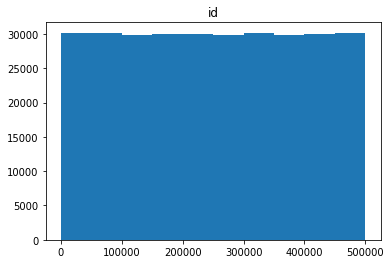

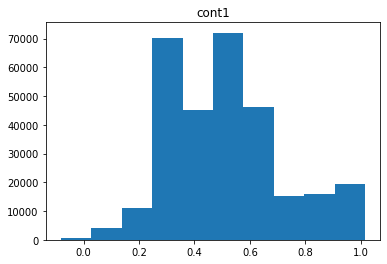

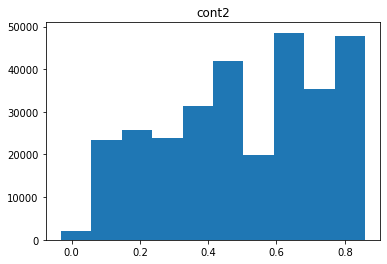

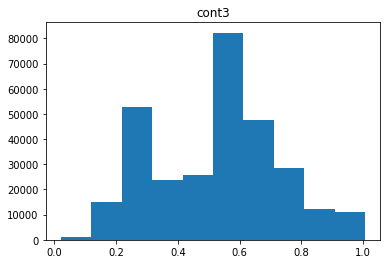

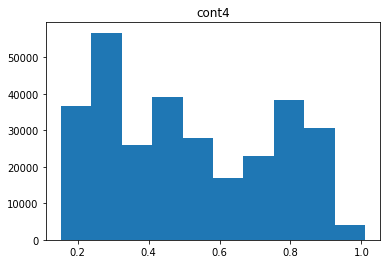

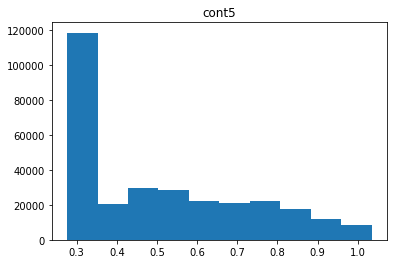

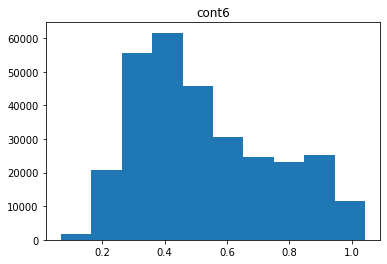

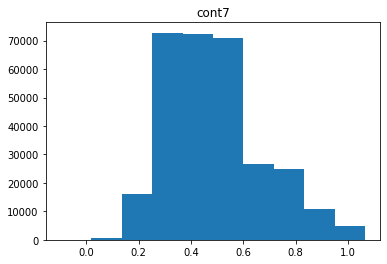

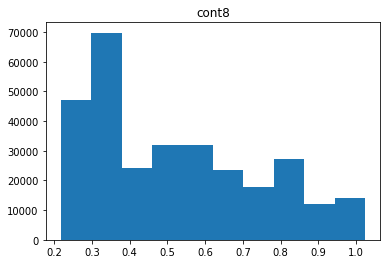

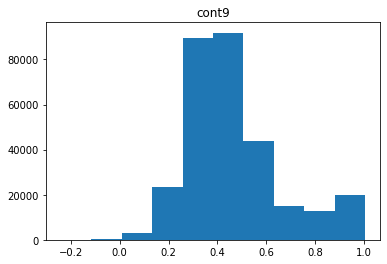

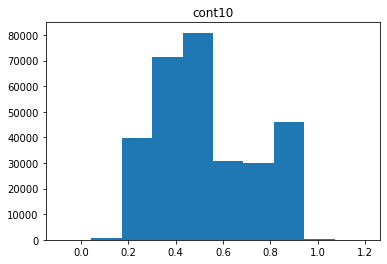

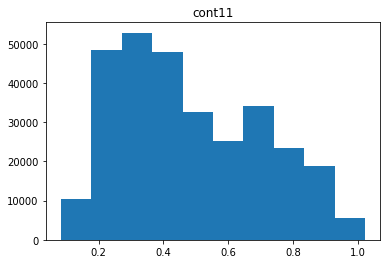

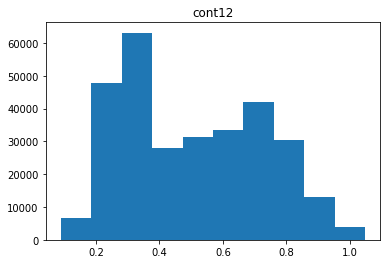

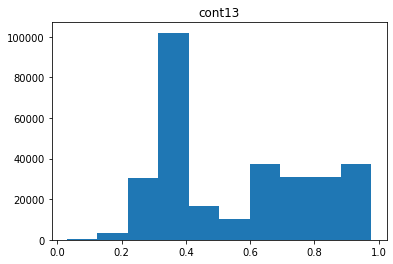

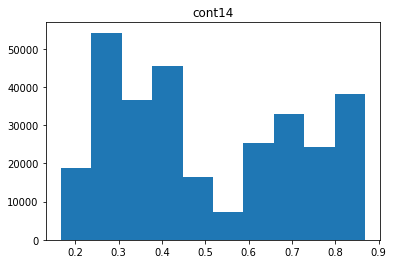

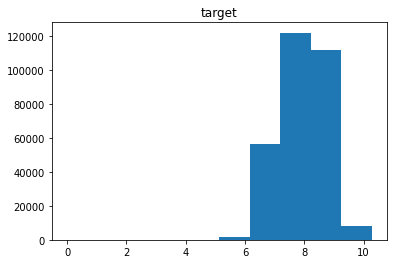

In [ ]:
#데이터 분포 확인하기 / 5/18 20:57 여기까지 진행 // # 2022-05-19 01:13 부터 다시 시작 

traindf.describe()
for column in traindf.columns :
  plt.title(column)
  plt.hist(traindf[column]) 
  plt.show()


  ## 결과 창을 확인하니 분포가 개판이긴함 - normalization 이나 각 데이터별로 target이랑 어떤 상관관계를 갖는지를 알아야될 듯. 이후 이걸 바탕으로 전처리
merge = (traindf , testdf )

                 id     cont1     cont2     cont3     cont4     cont5  \
id         1.000000 -0.001454  0.000574  0.001609  0.002131  0.001959   
cont1     -0.001454  1.000000 -0.080170 -0.419712  0.273705 -0.059012   
cont2      0.000574 -0.080170  1.000000  0.334487 -0.005533  0.150737   
cont3      0.001609 -0.419712  0.334487  1.000000 -0.329131  0.060931   
cont4      0.002131  0.273705 -0.005533 -0.329131  1.000000  0.123526   
cont5      0.001959 -0.059012  0.150737  0.060931  0.123526  1.000000   
cont6     -0.001971  0.698556  0.023692 -0.300509  0.152752 -0.179084   
cont7     -0.000155  0.341478  0.116222  0.106904 -0.077045 -0.241272   
cont8      0.002112  0.373340  0.081049 -0.309783  0.324784  0.010438   
cont9      0.000030  0.794003 -0.046769 -0.406743  0.261927 -0.071764   
cont10    -0.001652  0.725040  0.035101 -0.289756  0.204139 -0.102531   
cont11    -0.000484  0.565717  0.126024 -0.075415  0.063961 -0.222244   
cont12    -0.002075  0.600041  0.092642 -0.103735  

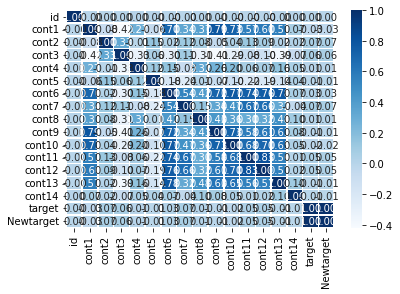

In [ ]:
# 연속형 자료형 들인 cont1 ~ cont14 와 target 간의 관계를 알아내고 싶다. - 데이터 개수 30만개여서 한번에 다 plot 하기에는 stackoverflow 나니, 일부 random 한 값들만 뽑아서 쓰자.
# 뚜렸한 선형 관계나 이런건 안보임..
traindf['Newtarget']  = (traindf['target']-traindf['target'].mean())/traindf['target'].std() ## normalization of target -> 큰 의미는 없음 parameters 
# for column in traindf.columns : 

#    x_tmp = traindf[column].to_numpy() 
#    y_tmp = traindf['Newtarget'].to_numpy() 
#    plt.title(column)
#    plt.plot(x_tmp[:100],y_tmp[:100], 'yo')
#    plt.show()

corr  = traindf.corr() ## 상관계수들을 바로 볼 수 있음 
print(corr) 
import seaborn as sb ## 시각화 Library 
sb.heatmap(data = traindf.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')


# cont6 이 cont9~13 까지와의 상관 계수가 0.7정도로 높음 즉 cont6이 뭔가 연결지어주는 parameter로 작용하는건가? 


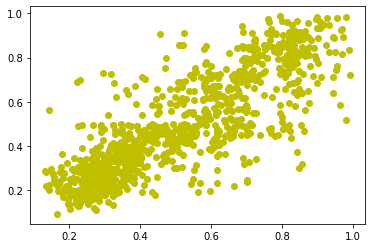

int64
id
                sampling_df  Newtarget
0        (0.999, 82851.667]   0.000214
1   (82851.667, 166244.667]  -0.003099
2    (166244.667, 249738.5]  -0.002156
3    (249738.5, 333185.333]   0.007759
4  (333185.333, 416704.167]  -0.003424
5    (416704.167, 499999.0]   0.000707
float64
cont1
        sampling_df  Newtarget
0  (-0.0833, 0.315]   0.068746
1    (0.315, 0.381]   0.049976
2    (0.381, 0.484]   0.007748
3    (0.484, 0.561]  -0.035248
4    (0.561, 0.688]  -0.060412
5    (0.688, 1.016]  -0.030810
float64
cont2
        sampling_df  Newtarget
0  (-0.0324, 0.229]  -0.131807
1    (0.229, 0.359]  -0.085323
2    (0.359, 0.553]   0.050310
3    (0.553, 0.622]   0.086164
4    (0.622, 0.763]  -0.007784
5     (0.763, 0.86]   0.088440
float64
cont3
      sampling_df  Newtarget
0   (0.02, 0.267]  -0.019247
1  (0.267, 0.467]  -0.066171
2  (0.467, 0.551]  -0.025881
3  (0.551, 0.612]  -0.037685
4  (0.612, 0.715]   0.006314
5  (0.715, 1.007]   0.142671
float64
cont4
      sampling_df  Newtar

In [ ]:
# 범주에 따라서 mean 값의 변화라도 관찰해보자. - cont1 cont3 normalization 하니깐 조금은 명확해 보이는 것 같기도 하네..? # 2022-05-02-03 여기까지
plt.plot(traindf['cont12'][:1000],traindf['cont11'][:1000],'yo')
plt.show()

traindf['Newtarget']  = (traindf['target']-traindf['target'].mean())/traindf['target'].std()
for column in traindf.columns : 
       print(traindf[column].dtypes)
       print(column)
       traindf['sampling_df'] = pd.qcut(traindf[column],6)
       
       print(traindf[['sampling_df','Newtarget']].groupby(['sampling_df'],as_index= False).mean().sort_values(by='sampling_df', ascending= True))
       

In [ ]:
## linear regression 모델이므로 linear regression을 써보고, gaussian regression 중 데이터가 많을 때 좋은 spartial GR 을 써보자. 
## 다중 공산성이 나타나므로 모델이 오버 피팅 될 수 있으므오 , Ridge / Lasso / Elastic net regression  -> 사용해보는 것 고려

# 여러가지 함수들 테스트 - 제곱, 지수, 삼각 모두 다 상관계수의 뚜렷한 개선은 없으므로, 일단 regression 때려보자.
for i,column in enumerate(traindf.columns) :
    if ( (i > 0) & (i<15) ) :
         new_column = 'cont'+str(i)+'_modified'
         traindf[new_column] = traindf[column] / traindf['cont6']

traindf.corr()['target'].sort_values(ascending= True)

cont1_modified    -0.076487
cont10_modified   -0.063975
cont13_modified   -0.054466
cont9_modified    -0.049339
cont1             -0.032994
cont14_modified   -0.027035
cont10            -0.021143
cont5_modified    -0.019866
cont9             -0.013029
cont13            -0.006642
cont14            -0.006609
cont5             -0.005358
cont8_modified    -0.005224
cont4_modified    -0.003329
id                 0.001347
cont4              0.005522
cont3_modified     0.009317
cont8              0.014698
cont6              0.027955
cont2_modified     0.028464
cont12_modified    0.028975
cont7_modified     0.035759
cont11_modified    0.037519
cont12             0.047809
cont11             0.050996
cont3              0.058936
cont2              0.067102
cont7              0.067234
target             1.000000
cont6_modified          NaN
Name: target, dtype: float64

In [ ]:
## dataset building 하기

# 이전까지 전처리는 없었으니 쿨하게  column 만든 것들 다 없애기 

traindf = pd.read_csv(traindir)
testdf = pd.read_csv(testdir)

# validation set 만들기 train set의 20%..!
validdf = traindf.sample(n = int(len(traindf)*0.1) , random_state = 2022)
traindf = traindf.drop(validdf.index) # sklearn split써도됨
traindf.describe()

dfs = (traindf,validdf,testdf)


# 정규화 (normalization or standarization)
for df in dfs : 
   for column in df.columns :
      if(column == 'id' or column == 'target') :
         continue 
      df[column]  = (df[column]-df[column].min())/(df[column].max()-df[column].min()) 

traindf_np = traindf.to_numpy().astype(float)
vailddf_np = validdf.to_numpy().astype(float)
testdf_np = testdf.to_numpy().astype(float)


# GPU활용하려면 .to(device) or cuda()
traindata = torch.from_numpy(traindf_np).cuda()
vailddata = torch.from_numpy(vailddf_np).cuda()
testdata = torch.from_numpy(testdf_np).cuda()
print(traindata.shape)

## 2022-05-19-17:30 아래 모델 정의하고 L1 L2 공부하고 dataloader로 바꾸기 전까지 완료


traindf.describe()

torch.Size([270000, 16])


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000
mean,249842.912696,0.536456,0.593897,0.507615,0.423345,0.297422,0.471122,0.503121,0.381409,0.562883,0.463453,0.426604,0.435536,0.552211,0.480529,7.905331
std,144452.394300,0.185615,0.256002,0.203618,0.271745,0.291000,0.222976,0.155554,0.267895,0.158008,0.159413,0.234192,0.227885,0.242385,0.296703,0.732748
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.700459
25%,124702.750000,0.387303,0.392970,0.327674,0.165852,0.010201,0.296834,0.381740,0.153865,0.459280,0.348868,0.231376,0.230731,0.338088,0.202748,7.328970
50%,249741.000000,0.515574,0.656034,0.538036,0.385098,0.230976,0.414196,0.485118,0.329507,0.528226,0.414798,0.381992,0.414701,0.482451,0.377875,7.939758
75%,374829.250000,0.660935,0.855594,0.636152,0.695061,0.519888,0.642729,0.583438,0.579723,0.655357,0.605482,0.634449,0.630776,0.779290,0.778221,8.469750
max,499998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.267569


In [ ]:
## dataloader를 사용하려면 custom dataset class 생성해야됨 이것은 len , getitem이 정의 되어있어야함 .객채 parsing


class MyDataset  :

   def __init__(self,x_tensor,y_tensor) : 
        
        self.x_train = x_tensor
        self.y_train = y_tensor

   def __len__(self) :
       return self.x_train.shape[0]

   def __getitem__(self,idx) : 

      return self.x_train[idx], self.y_train[idx]         


merged = (traindata,vailddata)

print(traindata.shape)
batchsize  = 100000
 
traindataset = MyDataset(traindata[:,1:15].float(),traindata[:,-1].float().view(-1,1))

validdataset = MyDataset(vailddata[:,1:15].float(),vailddata[:,-1].float().view(-1,1))

testdataset = MyDataset(testdata[:,1:15].float(),testdata[:,-1].float().view(-1,1))

trainloader = torch.utils.data.DataLoader(traindataset,batch_size = traindataset.len() ,shuffle = True)
validloader = torch.utils.data.DataLoader(validdataset,batch_size = batchsize, shuffle = True)
testloader = torch.utils.data.DataLoader(testdataset,batch_size = batchsize , shuffle = False)


torch.Size([270000, 16])


In [ ]:
## 2022-05-19 3:20 시작 아마 2시간~3시간 정도 할 수 있을 듯..?

## 모델 구성하기 

# Elastic net regression - why? 다중 공산성을 가지므로 근데 선형 회귀로 충분할까? - 그냥 nolinear 부여하는 activation function으로 relu를 함 써보고 쌓아보자..!
# https://www.richard-stanton.com/2021/06/19/pytorch-elasticnet.html 참고함 - pytorch implemetation은 틀린 것 같은데, 어차피 MSE Loss를 쓴느데..?



## MSE loss에서 L2 norm 그리고 내가 직접 L1 norm을 만들어서 loss에 반영함.

## 그냥 내가 layer 두텁게 쌓아본 것 . silu를 써보는 것도 방법인데 layer 개수가 많지 않으므로 pass

class CustomNetwork(nn.Module) :
     
     def __init__(self, num_parameters = 14, learning_rate = 0.1, Lambda = 0.5 , p = 0.2) :
        super(CustomNetwork, self).__init__()
        self.learning_rate = learning_rate
        self.Lambda = Lambda

        self.fc1  = nn.Linear(int(num_parameters) ,1024) 
        self.relu = nn.ReLU() ; 
        self.fc2  = nn.Linear(1024,2048)
        #self.dropout = nn.Dropout(p=p, inplace = False) 
        self.fc3  = nn.Linear(2048,2048)
        self.fc4 =  nn.Linear(2048,2048)
        self.fc5  =  nn.Linear(2048,1024)

        self.fc6  = nn.Linear(1024,512)
        self.fc7 = nn.Linear(512,1)

     def forward(self,x) : 

        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        #x = self.dropout(x) ## 데이터 수가 15개의 cont 보다 훠얼씬 많아 overfitting 될까봐
        x = self.relu(self.fc4(x))
        #x = self.dropout(x) 
        x = self.relu(self.fc5(x))
        x = self.fc7(self.relu(self.fc6(x)))

        return x 

class ElasticNetwork(nn.Module) :
     def __init__(self,loss_fn, num_paramters = 13, learning_rate = 0.1, L1Lambda = 0.5 , L2Lambda = 0.5, p = 0.2) :
        super(ElasticNetwork, self).__init__()
        self.learning_rate = learning_rate
        self.loss_fn  = loss_fn 
        self.L1Lambda = L1Lambda
        self.L2Lambda = L2Lambda 

        self.fc1 = nn.Linear(num_paramters , 1) 

        #self.dropout = nn.Dropout(p=p, inplace = False) 

     def forward(self,x) :

        return self.fc1(x)


## class for gaussian network 

## sklearn에서는 쉽게 prebuilt 된 것에 model.fit 하면 되겠지만.. torch로 구현한다면 adam을 통해 L2norm , torch.norm을 통해 L1norm을 구현해야한다.


def train( mymodel, trainloader,validloader , lr = 0.1,  epoch =100, regulation = 'Both',L2lambda = 0.5,L1lambda= 0.5, scheduler = None ) : #validloader 는 batch size 1로 하는게 좋을 것 같음.
    
    print("epoch = {} ".format(epoch))
    
    if (regulation == 'L1') :
             optimizer = torch.optim.SGD(mymodel.parameters(),lr)

    elif (regulation == 'Both' or regulation == 'L2') : 
             optimizer = torch.optim.SGD(mymodel.parameters(),lr, weight_decay = 0.1)      ## weight decay -> L2 regulation
    else :
       optimizer = torch.optim.SGD(mymodel.parameters(),lr)

    loss_function = torch.nn.MSELoss() # 평균값을 뱉어내기 위해서 
             
    train_losses = []
    
    if (scheduler is not None) :
          scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,20,30,40,50,60,70,80,90], gamma=0.9)
    for i in range(epoch) :
                mymodel.train()
                loss_epoch = 0 
                for idx,batch in enumerate(trainloader) :
                    batchsize= batch[0].shape[0]
                    x_train, y_train = batch 
                    

                    optimizer.zero_grad() 
                    y_pre = mymodel(x_train)
                    
                    loss = loss_function(y_pre,y_train)
                    if (regulation != 'L2' and regulation != 'None') :
                          loss += sum(p.abs().sum() for p in mymodel.parameters())
                    loss.backward()
                    optimizer.step()
                    if (scheduler is not None) :
                       scheduler.step()
                    loss_epoch += loss.item()

                    if ((idx+1)%5 == 0 ) :
                        print("loss of {}th epoch {}th batch : {}".format(i+1,idx+1,loss.item()))

                print("-------------------------------------------------------")
                print("{}th epoch train loss is {}".format(i+1,loss_epoch))
                train_losses.append(loss_epoch/batchsize)


                print("---------------------validation of after {} epoch ".format(i+1))
                valid_losses = []
                valid_loss = 0
                mymodel.eval()
                for x,y in validloader : 
                    
                    y_pre = mymodel(x) 
                    loss = loss_function(y_pre,y)
                    valid_loss += loss.item() 

                 
                print("{}th epoch vaild loss is {}".format(i+1,valid_loss))    
                valid_losses.append(valid_loss)         

    return (train_losses, valid_losses)





In [ ]:
!nvidia-smi

Fri May 20 07:53:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    32W /  70W |   2144MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os 


# Main training models 

network = CustomNetwork(num_parameters= 14)
#network = ElasticNetwork(num_paramters= 14,loss_fn='MSE')
network.cuda()
network.state_dict()

train_history , valid_history  = train(network,trainloader= trainloader, validloader = validloader, regulation = 'None',lr= 0.01, epoch  = 100, scheduler = 'OK' )


epoch = 100 
-------------------------------------------------------
1th epoch train loss is 181.12258911132812
---------------------validation of after 1 epoch 
1th epoch vaild loss is 54.11961364746094
-------------------------------------------------------
2th epoch train loss is 152.0252914428711
---------------------validation of after 2 epoch 
2th epoch vaild loss is 42.98531723022461
-------------------------------------------------------
3th epoch train loss is 109.14309692382812
---------------------validation of after 3 epoch 
3th epoch vaild loss is 12.524791717529297
-------------------------------------------------------
4th epoch train loss is 55.98878765106201
---------------------validation of after 4 epoch 
4th epoch vaild loss is 27.506940841674805
-------------------------------------------------------
5th epoch train loss is 60.30305767059326
---------------------validation of after 5 epoch 
5th epoch vaild loss is 2.250048875808716
---------------------------------

[0.552280843257904]


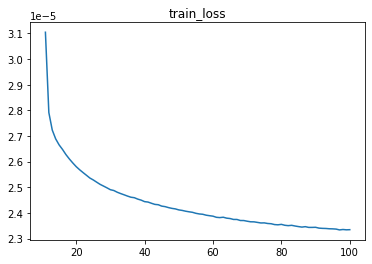

In [ ]:
#training valid 그리리

x = np.array([i+1 for i in range(len(train_history))])
print(valid_history)
plt.title("train_loss")
plt.plot(x[10:],train_history[10:])
#plt.plot(x,valid_history)
plt.show() 


In [ ]:
#모델 저장하기 
model_name = 'custommodelepoch100'
torch.save(network.state_dict(), '/content/drive/MyDrive/Kaggles/kaggle_tps1/{}.pth'.format(model_name))

In [ ]:
#모델 불러오기

#Network = CustomNetwork() 

#Network.load_state_dict(torch.load('/content/drive/MyDrive/Kaggles/kaggle_tps1/mynetwork_epoch20.pth'))

















In [ ]:
#test for submission

#!mkdir /content/drive/MyDrive/Kaggles/kaggle_tps1/test_out
network.eval()
test_out = network(testdata[:,1:15].float())
testdf['target'] = test_out.cpu().detach().numpy()
testdf.describe()

file_directory_testpre = '/content/drive/MyDrive/Kaggles/kaggle_tps1/test_out'

output_name = '/submission2.csv'
out_file = testdf[['id','target']].to_csv(file_directory_testpre+output_name,index=False)




In [ ]:
!kaggle competitions submit -c tabular-playground-series-jan-2021 -f /content/drive/MyDrive/Kaggles/kaggle_tps1/test_out/submission2.csv -m "Message"

## 제출하니 late submission 이며 1등은 0.695정도의 낮은 RMSE를 갖고 나는 0.82의 매우매우 높은 RMSE를 갖고 있었음. 둘다 아마 custom은 layer 수를 늘리고 epoch를 100정도 진행한다면, 0.7대까진 떨어질 수 있을 듯.
## 그러나 모델의 한계가 매우 명확하니 하나 더 해보자..!
## 원인 - 모델 한계(데이터가 많은 데에 비해 parameter나 구조가 매우 단순하였음) , 학습시 sheduler같은 거 안씀, 다른 모델을 만들어 보자..!



100% 3.07M/3.07M [00:02<00:00, 1.40MB/s]
Successfully submitted to Tabular Playground Series - Jan 2021

In [ ]:

## 모델 공부해서 구현해서 사용해보기 - tree?  DAE (Denoiser auto encoder) , LGBM XBM GBM에 대해 공부하자.














